Number of channels 1
Sample width 2
Frame rate. 10000
Number of frames 91472
parameters: _wave_params(nchannels=1, sampwidth=2, framerate=10000, nframes=91472, comptype='NONE', compname='not compressed')


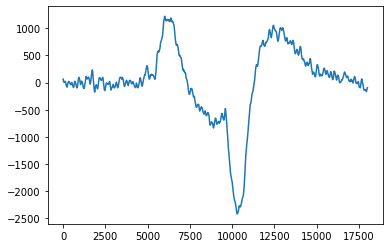

In [8]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import time



import wave, struct

wav = wave.open('Spiker_box_Louis/Short/LLL_L2.wav','r')
print( "Number of channels",wav.getnchannels())
print ( "Sample width",wav.getsampwidth())
print ( "Frame rate.",wav.getframerate())
print ("Number of frames",wav.getnframes())
print ( "parameters:",wav.getparams())


framerate = wav.getframerate()
nframes = wav.getnframes()


wav_array = np.array(struct.unpack("<" + "h"*nframes, wav.readframes(nframes)))
test_array = wav_array[13000:31000]

plt.plot(test_array)









In [ ]:




def classify_event(arr, downsample_rate=10, window_size_seconds=0.3):
    arr_ds = arr[0::downsample_rate]
    
    # Smooth wave
    window_length = int(window_size_seconds*samprate/downsample_rate + 1)
    filtered_arr = signal.savgol_filter(arr_ds, window_length, 1)
    
    # Get max min
    max_locs = np.array(signal.argrelextrema(filtered_arr, np.greater)[0])
    min_locs = np.array(signal.argrelextrema(filtered_arr, np.less)[0])
    
    
#     mins = arr_ds[min_locs]
#     mins = arr_ds[min_locs]
    
    
    max_min_locs = np.append(max_locs, min_locs)
    max_min = arr_ds[max_min_locs]

    # Sort vals    
    top_3 = sorted(max_min, key=abs, reverse=True)[0:3]

    if np.sum(np.sign(top_3)) == 1:
        lefts.append(arr)
        return "L"
    elif np.sum(np.sign(top_3)) == -1:
        rights.append(arr)
        return "R"
    else:
        idks.append(arr)
        return "idk"